# Implementing Grover's Algorithm Using Qiskit

My goal is to solve a simple 3-qubit problem with a single solution.


In [36]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

## Oracle Circuit

The oracle $Z_f$ must flip the phase of the bitstring corresponding to the number $3$: $011$. This means that $f(3)=1$ and $f(x)=0$ for all $x\neq 3$.

The implementation of this oracle is as follows:

1. Apply an X-gate to the leftmost qubit (the qubit corresponding to a $0$ in the solution bitstring).
2. Apply a multi-controlled Z-gate over all qubits. Only the state $\ket{111}$ will have its phase flipped.
3. Undo the X-gate from step 1.


In [37]:
def oracle() -> QuantumCircuit:
    # Create a QuantumCircuit implementing an oracle function
    # for Grover's Algorithm

    # The quantum circuit will have 3 qubits
    qc = QuantumCircuit(3)

    qc.x(2)
    qc.ccz(0, 1, 2)
    qc.x(2)

    return qc

## Grover's Operation

Grover's Operation is the operation repeatedly applied to a uniform superposition of basis states that amplifies the amplitude associated with the solution bitstring. As a series of operations, it is defined as $H^{\otimes n}Z_\text{OR}H^{\otimes n}Z_f$.


In [38]:
def grover_operation(oracle: QuantumCircuit):
    # Create a QuantumCircuit implementing Grover's Operation
    # for a 3-qubit system

    qc = QuantumCircuit(3)
    qc.compose(oracle, inplace=True)
    qc.h(range(3))

    # Implement Z_OR using controlled-Z gates
    qc.x(range(3))
    qc.ccz(0,1,2)
    qc.x(range(3))

    qc.h(range(3))

    return qc
    

## Grover's Algorithm

The circuit implementation for Grover's algorithm is defined as follows:

1. Apply a layer of Hadamard gates to all qubits
2. Apply Grover's Operation $\frac{\pi}{4}\sqrt{N}$ number of times, where $N=2^n$ for $n$ qubits.


In [39]:
def grover_algorithm():
    qc = QuantumCircuit(3, 3)

    qc.h(range(3))
    for _ in range(2):
        qc.compose(grover_operation(oracle()),inplace=True)
    qc.measure(range(3), range(3))

    result = AerSimulator().run(qc, shots=100, memory=True).result()
    measurements = result.get_memory()
    return measurements

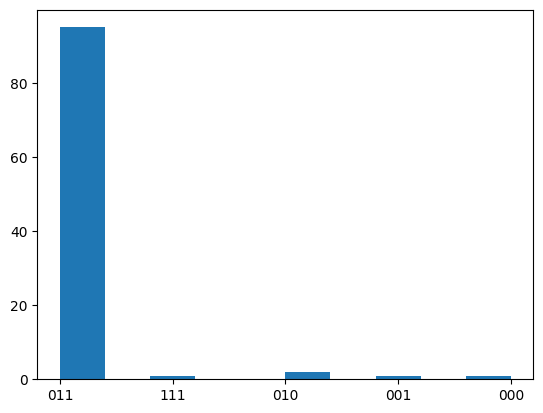

In [52]:
results = grover_algorithm()

p = plt.hist(results)
